In [1]:
# #### Life cycle of Machine learning Project

# #Understanding the Problem Statement
# # Data Collection
# # Data Checks to perform
# - Exploratory data analysis
# - Data Pre-Processing
# - Model Training
# - Choose best model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.shape

(1000, 8)

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [16]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
average                        194
dtype: int64

In [19]:
categorical_features=[feat for feat in df.columns if df[feat].dtype=='O']
numerical_features=[feat for feat in df.columns if df[feat].dtype!='O']

In [24]:
for i in categorical_features:
    print('different values in {} feature {}'.format(i,df[i].nunique()))

different values in gender feature 2
different values in race_ethnicity feature 5
different values in parental_level_of_education feature 6
different values in lunch feature 2
different values in test_preparation_course feature 2


In [25]:
for i in numerical_features:
    print('different values in {} feature {}'.format(i,df[i].nunique()))

different values in math_score feature 81
different values in reading_score feature 72
different values in writing_score feature 77
different values in total_score feature 194
different values in average feature 194


In [30]:
full_score=df[df['average']<=20]['average'].count()
full_score


2

<Axes: xlabel='average', ylabel='Count'>

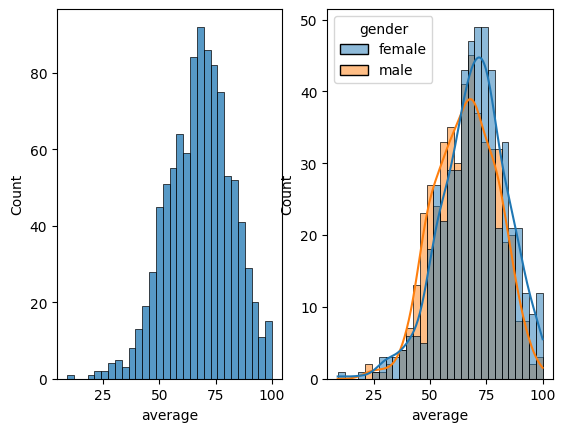

In [37]:
plt.subplots(1,2)
plt.subplot(121)
sns.histplot(x='average',data=df,bins=30)
plt.subplot(122)
sns.histplot(x='average',data=df,bins=30,hue='gender',kde=True)

<Axes: xlabel='total_score', ylabel='Count'>

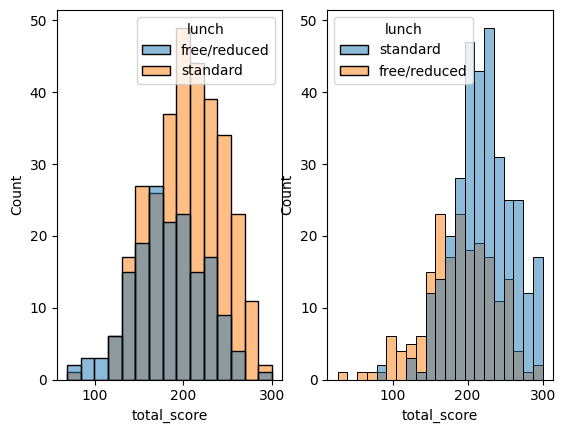

In [44]:
plt.subplots(1,2)
plt.subplot(121)
sns.histplot(df[df['gender']=='male'],x='total_score',hue='lunch')
plt.subplot(122)
sns.histplot(df[df['gender']=='female'],x='total_score',hue='lunch')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
